In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
root_path = "../data/"

### PPI

In [4]:
path = root_path + "/ppi_preprocessed.csv"
ppi_df = pd.read_csv(path)
ppi_df = ppi_df.drop(["Unnamed: 0"], axis=1)

print(ppi_df.shape)
ppi_df.head()

(327924, 2)


,gene1,gene2
0,9796,56992
1,7918,9240
2,8233,23548
3,4899,11253
4,5297,8601


In [5]:
protein_set_ppi = set(list(ppi_df["gene1"]) + list(ppi_df["gene2"]))
len(protein_set_ppi)

18505

In [6]:
pp_list = []

for idx in ppi_df.index:
    
    g1 = ppi_df["gene1"][idx]
    g2 = ppi_df["gene2"][idx]
    
    pp_list.append((g1, g2))

In [7]:
len(set(pp_list))

327924

In [8]:
G = nx.Graph()
G.add_edges_from(pp_list)

(array([1.8455e+04, 4.3000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 5.2090e+02, 1.0408e+03, 1.5607e+03, 2.0806e+03,
        2.6005e+03, 3.1204e+03, 3.6403e+03, 4.1602e+03, 4.6801e+03,
        5.2000e+03]),
 <BarContainer object of 10 artists>)

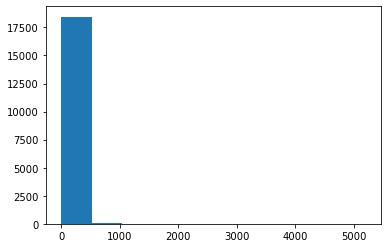

In [9]:
count_degrees = list(dict(G.degree).values())
plt.hist(count_degrees)

In [10]:
pd.DataFrame(count_degrees).value_counts()

1       1343
2        970
3        812
4        646
5        627
        ... 
364        1
366        1
368        1
369        1
5200       1
Length: 417, dtype: int64

---

### Drug - Protein

In [11]:
path = root_path + "/drug-gene.csv"
drug_gene_df = pd.read_csv(path)
drug_gene_df = drug_gene_df.drop(["Unnamed: 0"], axis=1)

print(drug_gene_df.shape)
drug_gene_df

(24649, 2)


,ID,entrez_id
0,DB00001,2147.0
1,DB00002,1956.0
2,DB00002,2215.0
3,DB00002,715.0
4,DB00002,712.0
...,...,...
24644,Thymosin,7132.0
24645,Thymosin,7133.0
24646,Thymosin,5757.0
24647,Tocilizumab,1.0


In [12]:
all_drug = set(drug_gene_df["ID"])
print(len(all_drug))

drug_withDB = set(filter(lambda x: x.startswith("DB"), list(drug_gene_df["ID"])))
print(len(drug_withDB))

drug_withoutDB = all_drug - drug_withDB
print(len(drug_withoutDB))

6253
6194
59


In [13]:
# removing drug without DB IDs
drug_gene_df = drug_gene_df[drug_gene_df["ID"].isin(drug_withDB)]

# removing proteins not in PPI
drug_gene_df = drug_gene_df[drug_gene_df["entrez_id"].isin(protein_set_ppi)]

print(drug_gene_df.shape)
drug_gene_df

(22230, 2)


,ID,entrez_id
0,DB00001,2147.0
1,DB00002,1956.0
2,DB00002,2215.0
3,DB00002,715.0
4,DB00002,712.0
...,...,...
24595,DB04219,79054.0
24596,DB09022,3757.0
24605,DB00873,2950.0
24606,DB00873,4609.0


In [14]:
dp_list = [] 
for idx in drug_gene_df.index:
    
    d = drug_gene_df["ID"][idx]
    p = drug_gene_df["entrez_id"][idx]
    
    dp_list.append((d, p))

In [15]:
len(set(dp_list))

22000

In [16]:
drug_set_dg = set(drug_gene_df["ID"])
print(len(drug_set_dg))

protein_set_dg = set(drug_gene_df["entrez_id"])
len(protein_set_dg)

6158


2850

In [17]:
path = root_path + "/drug-gene_preprocessed.csv"
drug_gene_df.to_csv(path)

---

### Disease - Protein

In [18]:
path = root_path + "/Guney16_preprocessed.csv"
disease_prot_df = pd.read_csv(path)
disease_prot_df = disease_prot_df.drop(["Unnamed: 0"], axis=1)

print(disease_prot_df.shape)
disease_prot_df

(1448, 1023)


,MESHID,1,2,3,4,5,6,7,8,9,...,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022
0,D000012,4547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D000013,374654,5820.0,9289.0,5824.0,4000.0,5828.0,3854.0,3852.0,3853.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D000015,374654,1302.0,8626.0,2657.0,5190.0,2138.0,5192.0,5077.0,5824.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D000052,2261,3643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D000130,2261,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,D059446,7405,4838.0,55997.0,7547.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,D061085,374654,2736.0,6496.0,6469.0,3476.0,7050.0,5727.0,3897.0,9990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1445,D061325,675,5892.0,5889.0,672.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1446,D000086382,8546,23476.0,6046.0,10283.0,124245.0,57153.0,9512.0,10897.0,481.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
disease_set_pdis = set(disease_prot_df["MESHID"])
print(len(disease_set_pdis))

1448


In [20]:
prot_list = []
for i in range(len(disease_prot_df)):
    
    for j in range(1,1023):
        
        value = disease_prot_df[str(j)][i]
        if(pd.isna(value) == False):
            prot_list.append(int(value))
            
            
prot_set_pdis = set(prot_list)
print(len(prot_set_pdis))

3452


In [21]:
# # removing disease not in Disease Set
# disease_prot_df = disease_prot_df[disease_prot_df["MESHID"].isin(disease_set_dd)]
# disease_set_pdis = set(disease_prot_df["MESHID"])
# print(len(disease_set_pdis))

In [22]:
prot_list = []
for i in disease_prot_df.index:
    for j in range(1,1023):
        
        value = disease_prot_df[str(j)][i]
#         print(value)
        if(pd.isna(value) == False):
            if(value not in protein_set_ppi):
                disease_prot_df[str(j)][i] = np.nan


/tmp/ipykernel_106887/4241401320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disease_prot_df[str(j)][i] = np.nan
/home/shreeya/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
disease_set_pdis = set(disease_prot_df["MESHID"])
print(len(disease_set_pdis))

1448


In [24]:
prot_list = []
for i in disease_prot_df.index:
    
    for j in range(1,1023):
        
        value = disease_prot_df[str(j)][i]
        if(pd.isna(value) == False):
            prot_list.append(int(value))
            
            
prot_set_pdis = set(prot_list)
print(len(prot_set_pdis))

3119


In [25]:
path = root_path + "/disease-prot_preprocessed.csv"
disease_prot_df.to_csv(path)

### Drug - Disease

In [26]:
path = root_path + "/original_disease_drug.tsv"
disease_drug_df = pd.read_csv(path, sep="\t")

print(disease_drug_df.shape)
disease_drug_df

(466657, 2)


,# Disease(MESH),Chemical
0,D005923,DB00564
1,D009503,DB01072
2,D016115,DB01759
3,D018476,DB00451
4,C567059,DB00641
...,...,...
466652,C565545,DB00482
466653,D009164,DB00977
466654,D010518,DB04216
466655,D002653,DB02701


In [27]:
drug_set_dd = set(disease_drug_df["Chemical"])
print(len(drug_set_dd))

disease_set_dd = set(disease_drug_df["# Disease(MESH)"])
print(len(disease_set_dd))

1663
5536


In [28]:
# removing drug not in Drug Set
disease_drug_df = disease_drug_df[disease_drug_df["Chemical"].isin(drug_set_dg)]

# removing disease not in Disease Set
disease_drug_df = disease_drug_df[disease_drug_df["# Disease(MESH)"].isin(disease_set_pdis)]

print(disease_drug_df.shape)
disease_drug_df

(195811, 2)


,# Disease(MESH),Chemical
0,D005923,DB00564
1,D009503,DB01072
8,D001249,DB00814
12,D001943,DB00300
16,D001281,DB01394
...,...,...
466643,D015228,DB00466
466644,D003928,DB04348
466651,D015228,DB00114
466653,D009164,DB00977


In [29]:
drug_set_dd = set(disease_drug_df["Chemical"])
print(len(drug_set_dd))

disease_set_dd = set(disease_drug_df["# Disease(MESH)"])
print(len(disease_set_dd))

1416
1271


In [30]:
path = root_path + "/disease-drug_preprocessed.csv"
disease_drug_df.to_csv(path)

---

### PPI Decagon

In [ ]:
path = root_path + "/bio-decagon-ppi.csv"
ppi2_df = pd.read_csv(path)

print(ppi2_df.shape)
ppi2_df.head()

In [ ]:
protein_set_ppi2 = set(list(ppi2_df["Gene 1"]) + list(ppi2_df["Gene 2"]))
len(protein_set_ppi2)

In [ ]:
pp2_list = []

for idx in ppi2_df.index:
    
    g1 = ppi2_df["Gene 1"][idx]
    g2 = ppi2_df["Gene 2"][idx]
    
    pp2_list.append((g1, g2))

In [ ]:
G = nx.Graph()
G.add_edges_from(pp2_list)

In [ ]:
count_degrees = list(dict(G.degree).values())
plt.hist(count_degrees)

In [ ]:
pd.DataFrame(count_degrees).value_counts()

---

In [ ]:
protein_set_ppi

In [ ]:
disease_set_dd
drug_set_dd

In [ ]:
disease_set_pdis
prot_set_pdis

In [ ]:
drug_set_dg
protein_set_dg

In [ ]:
protein_set_ppi2

In [ ]:
inter_ppi_pdis = protein_set_ppi.intersection(prot_set_pdis)
union_ppi_pdis = protein_set_ppi.union(prot_set_pdis)
print(len(protein_set_ppi), len(prot_set_pdis), len(inter_ppi_pdis), len(union_ppi_pdis))

# remove not 3119

In [ ]:
inter_ppi_dg = protein_set_ppi.intersection(protein_set_dg)
union_ppi_dg = protein_set_ppi.union(protein_set_dg)
print(len(protein_set_ppi), len(protein_set_dg), len(inter_ppi_dg), len(union_ppi_dg))

# remove not 3119

In [ ]:
total_intersection = protein_set_ppi.intersection(protein_set_dg.intersection(prot_set_pdis))
minor_intersection = protein_set_dg.intersection(prot_set_pdis)
print(len(total_intersection), len(minor_intersection))

In [ ]:
inter_dd_pdis = disease_set_dd.intersection(disease_set_pdis)
union_dd_pdis = disease_set_dd.union(disease_set_pdis)
print(len(disease_set_dd), len(disease_set_pdis), len(inter_dd_pdis), len(union_dd_pdis))

In [ ]:
inter_dd_dg = drug_set_dd.intersection(drug_set_dg)
union_dd_dg = drug_set_dd.union(drug_set_dg)
print(len(drug_set_dd), len(drug_set_dg), len(inter_dd_dg), len(union_dd_dg))

In [ ]:
inter_ppi2_pdis = protein_set_ppi2.intersection(prot_set_pdis)
union_ppi2_pdis = protein_set_ppi2.union(prot_set_pdis)
print(len(protein_set_ppi2), len(prot_set_pdis), len(inter_ppi2_pdis), len(union_ppi2_pdis))

In [ ]:
inter_ppi2_dg = protein_set_ppi2.intersection(protein_set_dg)
union_ppi2_dg = protein_set_ppi2.union(protein_set_dg)
print(len(protein_set_ppi2), len(protein_set_dg), len(inter_ppi2_dg), len(union_ppi2_dg))

In [ ]:
total_intersection = protein_set_ppi2.intersection(protein_set_dg.intersection(prot_set_pdis))
minor_intersection = protein_set_dg.intersection(prot_set_pdis)
print(len(total_intersection), len(minor_intersection))